## SPAM FILTER USING MULTINOMIAL NAIVE BAYES ALGORITHM
In this project we will use the multinomial naive bayes model from sci-learn to classify a new message as spam or ham (non-spam). We will also use the CountVectorizer to create integer word count vectors for each message.

We will be using the dataset from https://archive.ics.uci.edu/ml/datasets/sms+spam+collection.

In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# read file with pandas and relabel the columns
file=pd.read_csv("/Users/krishnan/downloads/SMSSpamCollection", header=None, sep='\t', names=['Label','SMS'])

# explore the dataset
print(file.head(5))
print(file.info())

  Label                                                SMS
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Label    5572 non-null object
SMS      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB
None


ham     86.59
spam    13.41
Name: Label, dtype: float64


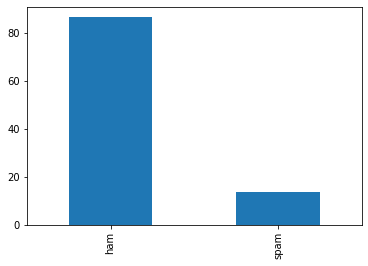

In [2]:
# spam and ham distribution
dist=(pd.value_counts(file['Label'], normalize=True)*100).round(2)
print(dist)
dist.plot(kind='bar')
plt.show()

In [3]:
# we will now randomize the file
randomized_file=file.sample(frac=1, random_state=1)

# the sms column has non-word characters which we don't require
randomized_file['SMS'] = randomized_file['SMS'].str.replace('\W' , ' ')
randomized_file['SMS'] = randomized_file['SMS'].str.lower()
print(randomized_file[5:10])

     Label                                                SMS
5461   ham  ok i thk i got it  then u wan me 2 come now or...
4210   ham  i want kfc its tuesday  only buy 2 meals only ...
4216   ham                         no dear i was sleeping   p
1603   ham                          ok pa  nothing problem   
1504   ham                    ill be there on   lt   gt   ok 


In [4]:
# we will split the data for test/train validation. we are doing an 20/80 split
train_data=randomized_file.sample(4458, random_state=1).reset_index(drop=True)
test_data=randomized_file.sample(1114, random_state=1).reset_index(drop=True)

# verify that our test and train data are random enough to have the same percentage of spam and ham messages
train_data['Label'].value_counts(normalize=True)
dist1=pd.value_counts(test_data['Label'], normalize=True)
dist2=pd.value_counts(train_data['Label'],normalize=True)
print(dist1)
print('\n \n')
print(dist2)


ham     0.861759
spam    0.138241
Name: Label, dtype: float64

 

ham     0.866756
spam    0.133244
Name: Label, dtype: float64


In [5]:
# we now instantiate the CountVectorizer. we do this to get our integer vector features used to fit the multinomialnb model
cv = CountVectorizer()
# transform the sms column of train data
traincv = cv.fit_transform(train_data['SMS'])
# train label
trainlabels=train_data['Label']

# we transform test sms columns to vector for testing
testcv=cv.transform(test_data['SMS'])

# instantiate multinomialnb model and use the traincv to fit the model with trainlabel as the target column
mnb=MultinomialNB()
mnb.fit(traincv,trainlabels)

# testing
test_data['predictions']=mnb.predict(testcv)

# check th accuracy of our model with the test data
correct = 0
total = test_data.shape[0]

for row in test_data.iterrows():
    row = row[1]
    if row['Label'] == row['predictions']:
        correct += 1

print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct / total)

Correct: 1108
Incorrect: 6
Accuracy: 0.9946140035906643


We got an accuracy of 99.46% which is decent. We can further increase the use case of our model by replacing the current data set with a much bigger data set.

In [6]:
# a fun function that takes in a message via std in and classifies as spam or ham
def spamornot():
    message = input("Enter message: ")
    message=message.replace('\W' , ' ')
    message=[message]
    transformed_message=cv.transform(message)
    prediction=mnb.predict(transformed_message)
    print(prediction)

In [7]:
spamornot()

Enter message: Hello I am your new boss
['ham']


In [8]:
spamornot()

Enter message: free money click the link right now
['spam']
